This Note-book considers KD-tree. It has recursive binary splits based on median values. Here, we consider 2 dimensions values.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 2 relevant variables + 2 irrelevant variables
from RPTree import *
from estimators import *
from os import listdir
from os.path import isfile, join
import pandas as pd
mypath = 'data/sampledNonLinData/2/2/2-2-0.45832/50RandomDatasetsFromNetworkWithNumSamples_0000000040/'
def read_file(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    sublist = []
    for each in onlyfiles:
        sub = pd.read_csv(mypath + each)
        sub.columns=['X1', 'X2', 'X3', 'X4', 'Y'] 
        sublist.append(sub)

    df = pd.concat(sublist)
    df = df[['X1', 'X2', 'X3', 'X4', 'Y']]
    for _ in range(5, 200):
        name = 'X' + str(_)
        pre = 'X' + str(_-1)
        stop = False
        while not stop:
            num = np.random.randint(-1,2)
            if num:
                break  
        df[name] = df[pre] + np.random.random(df.shape[0]) * num
    return df
# df=read_file(mypath)
# df

In [6]:
mypath = listdir('data/sampledNonLinData/2/2/2-2-0.45832/')
all_files = [read_file('data/sampledNonLinData/2/2/2-2-0.45832/' + each + '/') for each in mypath]
all_files = [(each.shape, each) for each in all_files]
all_files.sort()
all_files = [each[1] for each in all_files]


df = all_files[0]
df

,X1,X2,X3,X4,Y,X5,X6,X7,X8,X9,...,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199
0,0.526920,-0.576410,-0.801240,0.766940,1,1.762312,1.871241,2.819907,1.904788,1.971152,...,-0.590302,-1.434124,-1.543587,-2.171164,-2.672414,-2.924924,-3.259768,-2.579988,-3.545028,-3.583177
1,0.691890,0.529460,-0.523940,-0.997290,1,-0.350371,0.019498,0.590522,0.015710,0.434388,...,-3.999467,-4.999459,-5.806077,-5.836663,-5.933050,-6.720176,-7.654981,-6.968697,-7.790859,-8.723085
2,-0.297850,-0.788320,0.768770,-0.441570,1,0.267601,1.214426,2.032810,1.490148,2.021444,...,-6.765774,-7.543290,-8.343408,-8.348430,-8.923639,-9.336543,-10.080832,-9.535461,-9.589030,-10.036166
3,-0.811390,0.894460,0.062686,-0.351200,1,-0.100856,0.234013,1.208982,0.889159,0.950366,...,-6.888246,-7.528686,-8.034578,-8.977713,-9.884126,-10.188271,-11.100084,-10.147635,-10.780333,-11.098685
4,-0.329650,-0.193340,0.088166,0.091000,1,0.498495,1.116808,1.621662,0.888676,1.494422,...,-0.888193,-1.344369,-2.073565,-2.402875,-2.663194,-2.983812,-3.553466,-3.468275,-4.227714,-5.215946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-0.313280,-0.529750,-0.128130,0.053503,1,0.435987,0.891895,1.281761,0.541751,0.618555,...,-6.646273,-7.251617,-7.455172,-8.028426,-8.246802,-9.044386,-9.184093,-8.460234,-8.756946,-8.899522
15,-0.009191,0.768060,-0.493710,-0.474420,1,-0.218056,0.198079,0.721189,-0.057940,0.047535,...,0.713453,0.582471,-0.195374,-0.855023,-1.477083,-2.032930,-3.029891,-2.997147,-3.404214,-4.145244
16,0.934310,-0.010608,-0.380360,-0.227910,1,0.620726,1.066713,1.346844,0.402098,1.101370,...,1.646283,0.771036,0.511422,0.026861,-0.537610,-1.153532,-1.180724,-0.909417,-1.196900,-1.790611
17,0.507850,-0.896690,-0.290590,-0.035872,0,0.026378,0.360035,1.018547,0.053623,0.086303,...,-2.677691,-3.072869,-3.105108,-3.709711,-3.874602,-4.460159,-5.348889,-4.518753,-5.246051,-5.457665


In [7]:
from RPTree import *
from estimators import *
from copy import deepcopy

def run(X, y, MinSize, y_dic, estimator='naive_estimate', set_bins=None, types='median'):
    """n represents how many dimensions, can't do repeatation
    """
    tree = RPTree(X)
    tree_made = tree.MakeTree(MinSize, types=types)
    if set_bins and tree_made.counts() != set_bins:
        return [None] * 4
    all_entropy, bins, depth = get_entropy(tree_made, y_dic, MinSize, estimator=estimator)
    res, L = all_entropy[X]['entropy'], all_entropy[X]['loglikelihood'] # main entropy
    est = eval(estimator)
    y_entropy = est(y)
    aic = L + bins
    return 1-res/y_entropy, L, bins, depth, aic, MinSize, all_entropy

In [9]:
result_dic = {}

final_aic, final_fmi, final_bin = 0, 0, 0
sizes = [i for i in range(2, 101)]
for df in all_files:
    all_result = {}
    aic_result = {}
    entro_result = {}
    entro_dic_result = {}
    x_lst = tuple([tuple(each) for each in df.iloc[:,:-1].values.tolist()])
    y_dic = dict(zip(x_lst, df.Y.values.tolist()))
    X, Y = x_lst, df.Y.values
    print('Start: ' , df.shape[0])
    if df.shape[0] > 10000:
        print('Stop')
        break
    for rep in range(3):
        for size in sizes:
            fmi, L, bins, depth, aic, MinSize, entropy_dic = run(X, Y, size, y_dic, estimator='naive_estimate', types='kd')
            if bins not in all_result:
                all_result[bins] = [fmi]
                aic_result[bins] = [aic]
                entro_result[bins] = [L]
                entro_dic_result[bins] = [entropy_dic]
            else:
                all_result[bins].append(fmi)
                aic_result[bins].append(aic)
                entro_result[bins].append(L)
                entro_dic_result[bins].append(entropy_dic)

            if not final_aic or final_aic > aic:
                final_aic = aic
                final_fmi = fmi
                final_bin = bins
    result_dic[df.shape[0]] = [all_result, aic_result, entro_result, entro_dic_result]
    print("Finished")  

Start:  950
Finished
Start:  1950


KeyboardInterrupt: 

In [16]:
final_aic, final_fmi

(377.5523149639272, 0.08699368370420357)

In [11]:
# import pickle

# with open('Base_Line_1_KD_Tree_add_Irrelevant_Variables1.p', 'wb') as fp:
#     pickle.dump(result_dic, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
# import pickle

# with open('Base_Line_1_KD_Tree_add_Irrelevant_Variables.p', 'rb') as fp:
#     result_dic = pickle.load(fp)

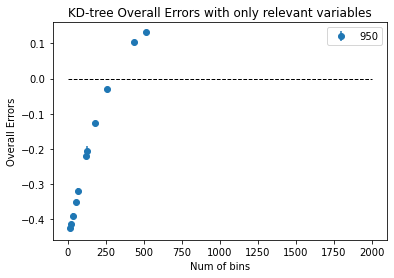

In [11]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def bias_std(dic):
    """
    dic = result_dic[key]
    """
    bias_lst = [np.mean(dic[key])-0.45832 for key in dic]
    std_lst = [np.std(dic[key]) for key in dic]
    summ = pd.DataFrame({'Mean': bias_lst, 'std': std_lst})
    summ.index = list(dic.keys())
    return summ

fig, ax11 = plt.subplots(sharex=True, sharey=False)
ax11.set_xlabel('Num of bins')
ax11.set_title('KD-tree Overall Errors with only relevant variables')
ax11.set_ylabel('Overall Errors')
for key in result_dic:
    summ = bias_std(result_dic[key][0])
    summ = summ.sort_index()
    ind = summ.index
    y = summ[f'Mean']
    yerr = summ[f'std'].values
    ax11.errorbar(ind, y, yerr=yerr, fmt='o', label=str(key))

#     ax11.hist( x=james_dic1[50], bins=20, width=0.010, label='James-Stein')
#     ax11.hist( x=reliable_dic1[50], bins=20, width=0.015, label='Reliable')
#     ax11.hist( x=naive_dic1[50], bins=20, width=0.015, label='Naive')
ax11.hlines(0, xmin=0, xmax=2000, color='k', linestyle='dashed', linewidth=1)
ax11.legend()
plt.show()

In [26]:
def find_y(dic):
    new_y_lst = []
    for each in dic:
        new_y = []
        for key in each.keys(): 
            if "main" in each[key]:
                a, b = each[key]['main']
                a, b = list(a), list(b)
                if len(a) == 1:
                    new_y += a*b[0]
                else:
                    new = [a[0]] * b[0] + [a[1]] * b[1]
                    new_y += [np.mean(new)] * (b[0] + b[1])
                        
        entro = entropy(np.array(new_y))
        new_y_lst.append(entro)
    return np.array(new_y_lst)


def ave_model(result_dic, n):
    weights = [math.exp(-each) for code in result_dic[n][1].keys() for each in result_dic[n][1][code]]
    para = 1/sum(weights)
    weights = np.array([para * each for each in weights])

    entro = [each/n for code in result_dic[n][2].keys() for each in result_dic[n][2][code]]
    norm_entro = sum(np.array(entro) * weights)

    entro_y = []
    for key in result_dic[n][3].keys():
        for code in find_y(result_dic[n][3][key]):
            entro_y.append(code)
            
    entro_y = sum((np.array(entro_y) * weights))
    return 1 - norm_entro/entro_y

for key in result_dic.keys():
    print("n:", key, "FMI: ", ave_model(result_dic, key))

n: 950 FMI:  0.8871979561386275
